In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart.csv to heart.csv
User uploaded file "heart.csv" with length 11312 bytes


In [2]:
import pandas as pd
import io

heart = pd.read_csv(io.StringIO (uploaded ['heart.csv'].decode ('utf-8')) )
heart.head ()      #   to get first n rows instead of whole file print

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130.0,250,0,1,187,0,3.5,0,0,2,1
2,NaN,0,1,NaN,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120.0,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120.0,354,0,1,163,1,0.6,2,0,2,1


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
heart.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','resting_ecg','max_heart_rate','exercise_induce_angina','st_depression','st_slope','no_vessels','heart_rate','target']
print(heart)


      age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0    63.0    1                3                   145.0          233   
1    37.0    1                2                   130.0          250   
2     NaN    0                1                     NaN          204   
3    56.0    1                1                   120.0          236   
4    57.0    0                0                   120.0          354   
..    ...  ...              ...                     ...          ...   
298  57.0    0                0                   140.0          241   
299  45.0    1                3                   110.0          264   
300   NaN    1                0                   144.0          193   
301  57.0    1                0                   130.0          131   
302   NaN    0                1                   130.0          236   

     fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induce_angina  \
0                      1            0             150 

In [5]:
x   = heart.iloc[:,13:].values
y   =heart.iloc[:,13].values



In [6]:
print(heart.isnull().sum())
print (heart.info())

age                       5
sex                       0
chest_pain_type           0
resting_blood_pressure    1
cholesterol               0
fasting_blood_sugar       0
resting_ecg               0
max_heart_rate            0
exercise_induce_angina    0
st_depression             0
st_slope                  0
no_vessels                0
heart_rate                0
target                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     298 non-null    float64
 1   sex                     303 non-null    int64  
 2   chest_pain_type         303 non-null    int64  
 3   resting_blood_pressure  302 non-null    float64
 4   cholesterol             303 non-null    int64  
 5   fasting_blood_sugar     303 non-null    int64  
 6   resting_ecg             303 non-null    int64  
 7   max_hear

In [7]:
print (heart.dropna(inplace=True))
print (heart.info())


None
<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     298 non-null    float64
 1   sex                     298 non-null    int64  
 2   chest_pain_type         298 non-null    int64  
 3   resting_blood_pressure  298 non-null    float64
 4   cholesterol             298 non-null    int64  
 5   fasting_blood_sugar     298 non-null    int64  
 6   resting_ecg             298 non-null    int64  
 7   max_heart_rate          298 non-null    int64  
 8   exercise_induce_angina  298 non-null    int64  
 9   st_depression           298 non-null    float64
 10  st_slope                298 non-null    int64  
 11  no_vessels              298 non-null    int64  
 12  heart_rate              298 non-null    int64  
 13  target                  298 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.

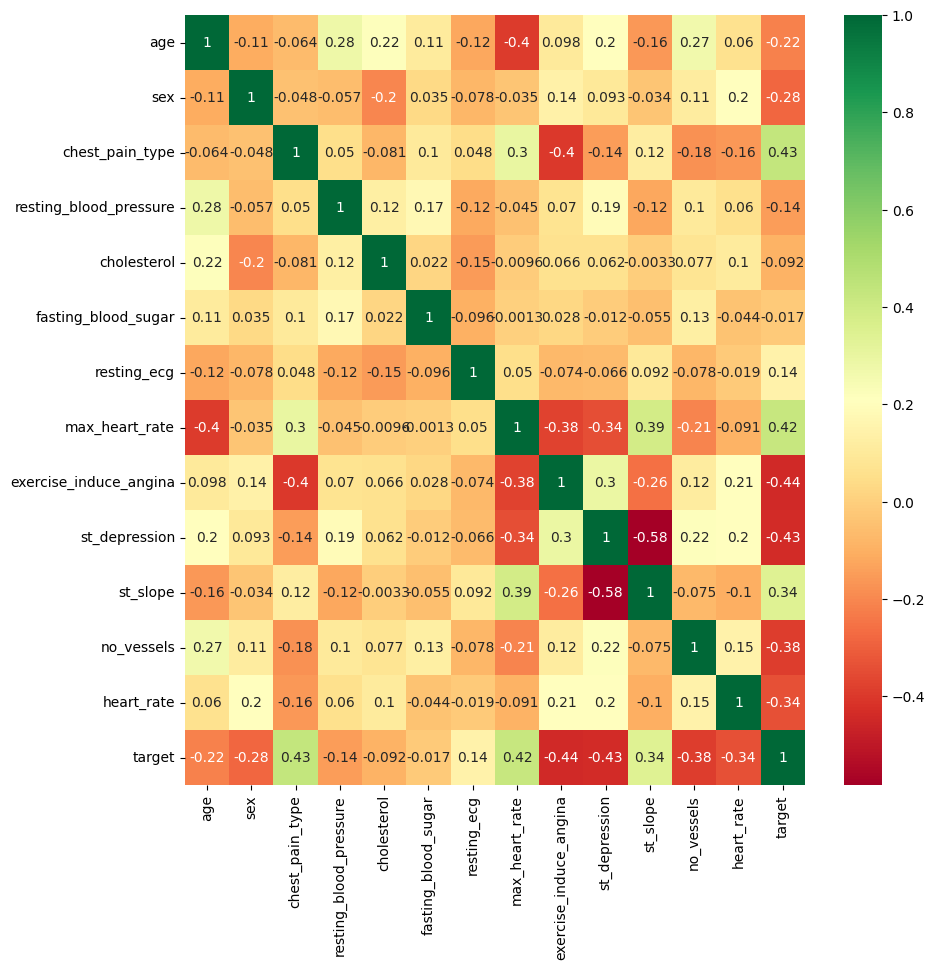

In [8]:
#get correlations of each features in dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (10,10))

sns.heatmap(heart.corr(),annot=True, cmap="RdYlGn")
plt.yticks(rotation=0)          # This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.show()

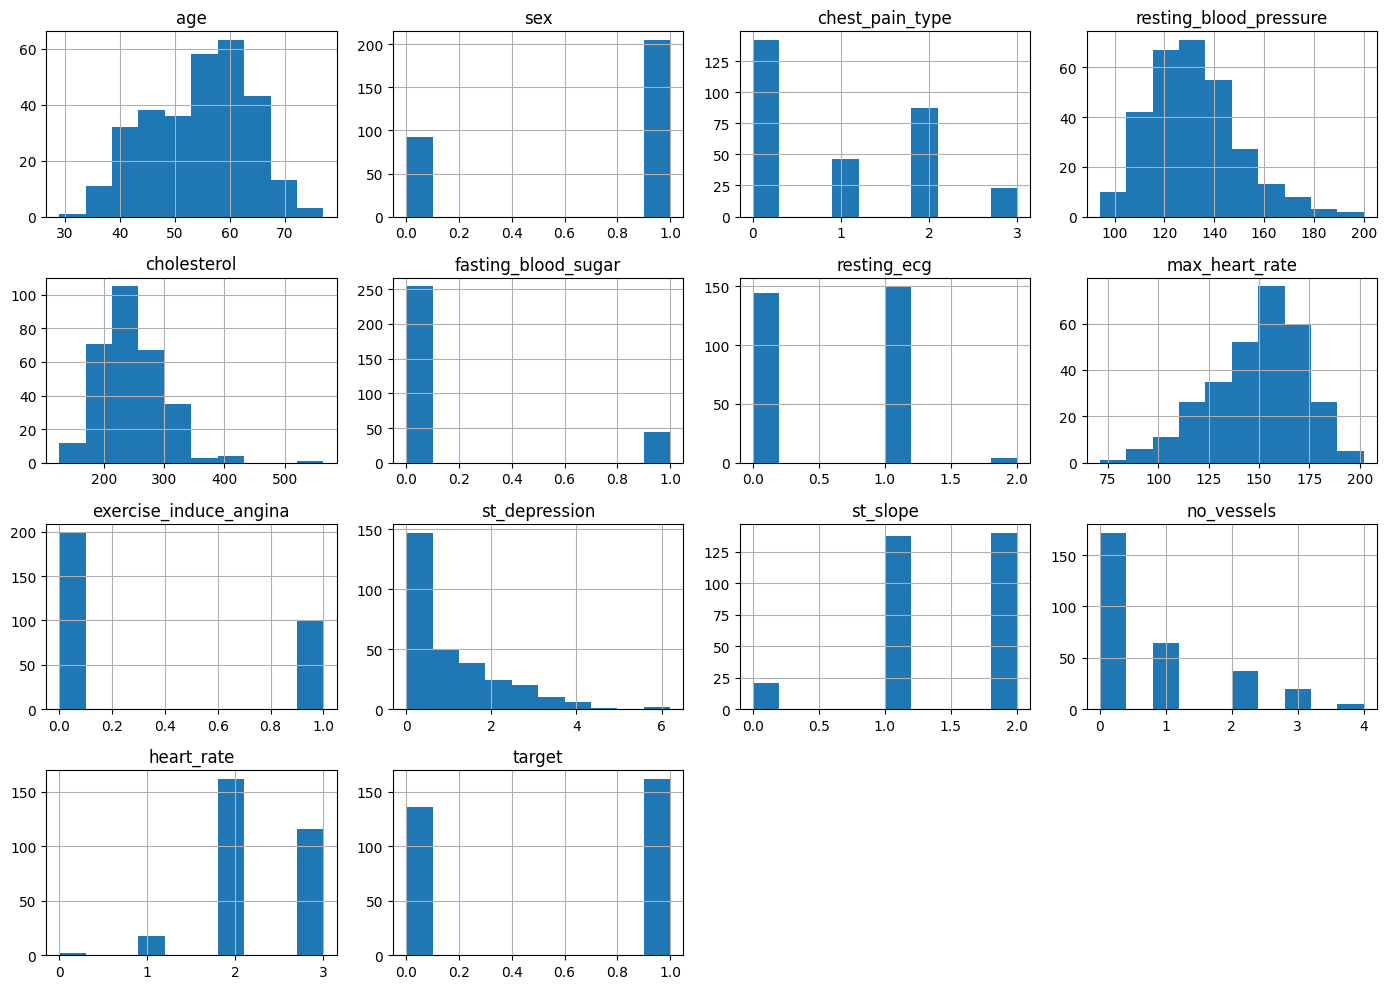

In [9]:
#data visualization


heart.hist(figsize=(14,10))      #width(rows),height(columns)
plt.tight_layout()           #prevents subplots overlapping
plt.show()


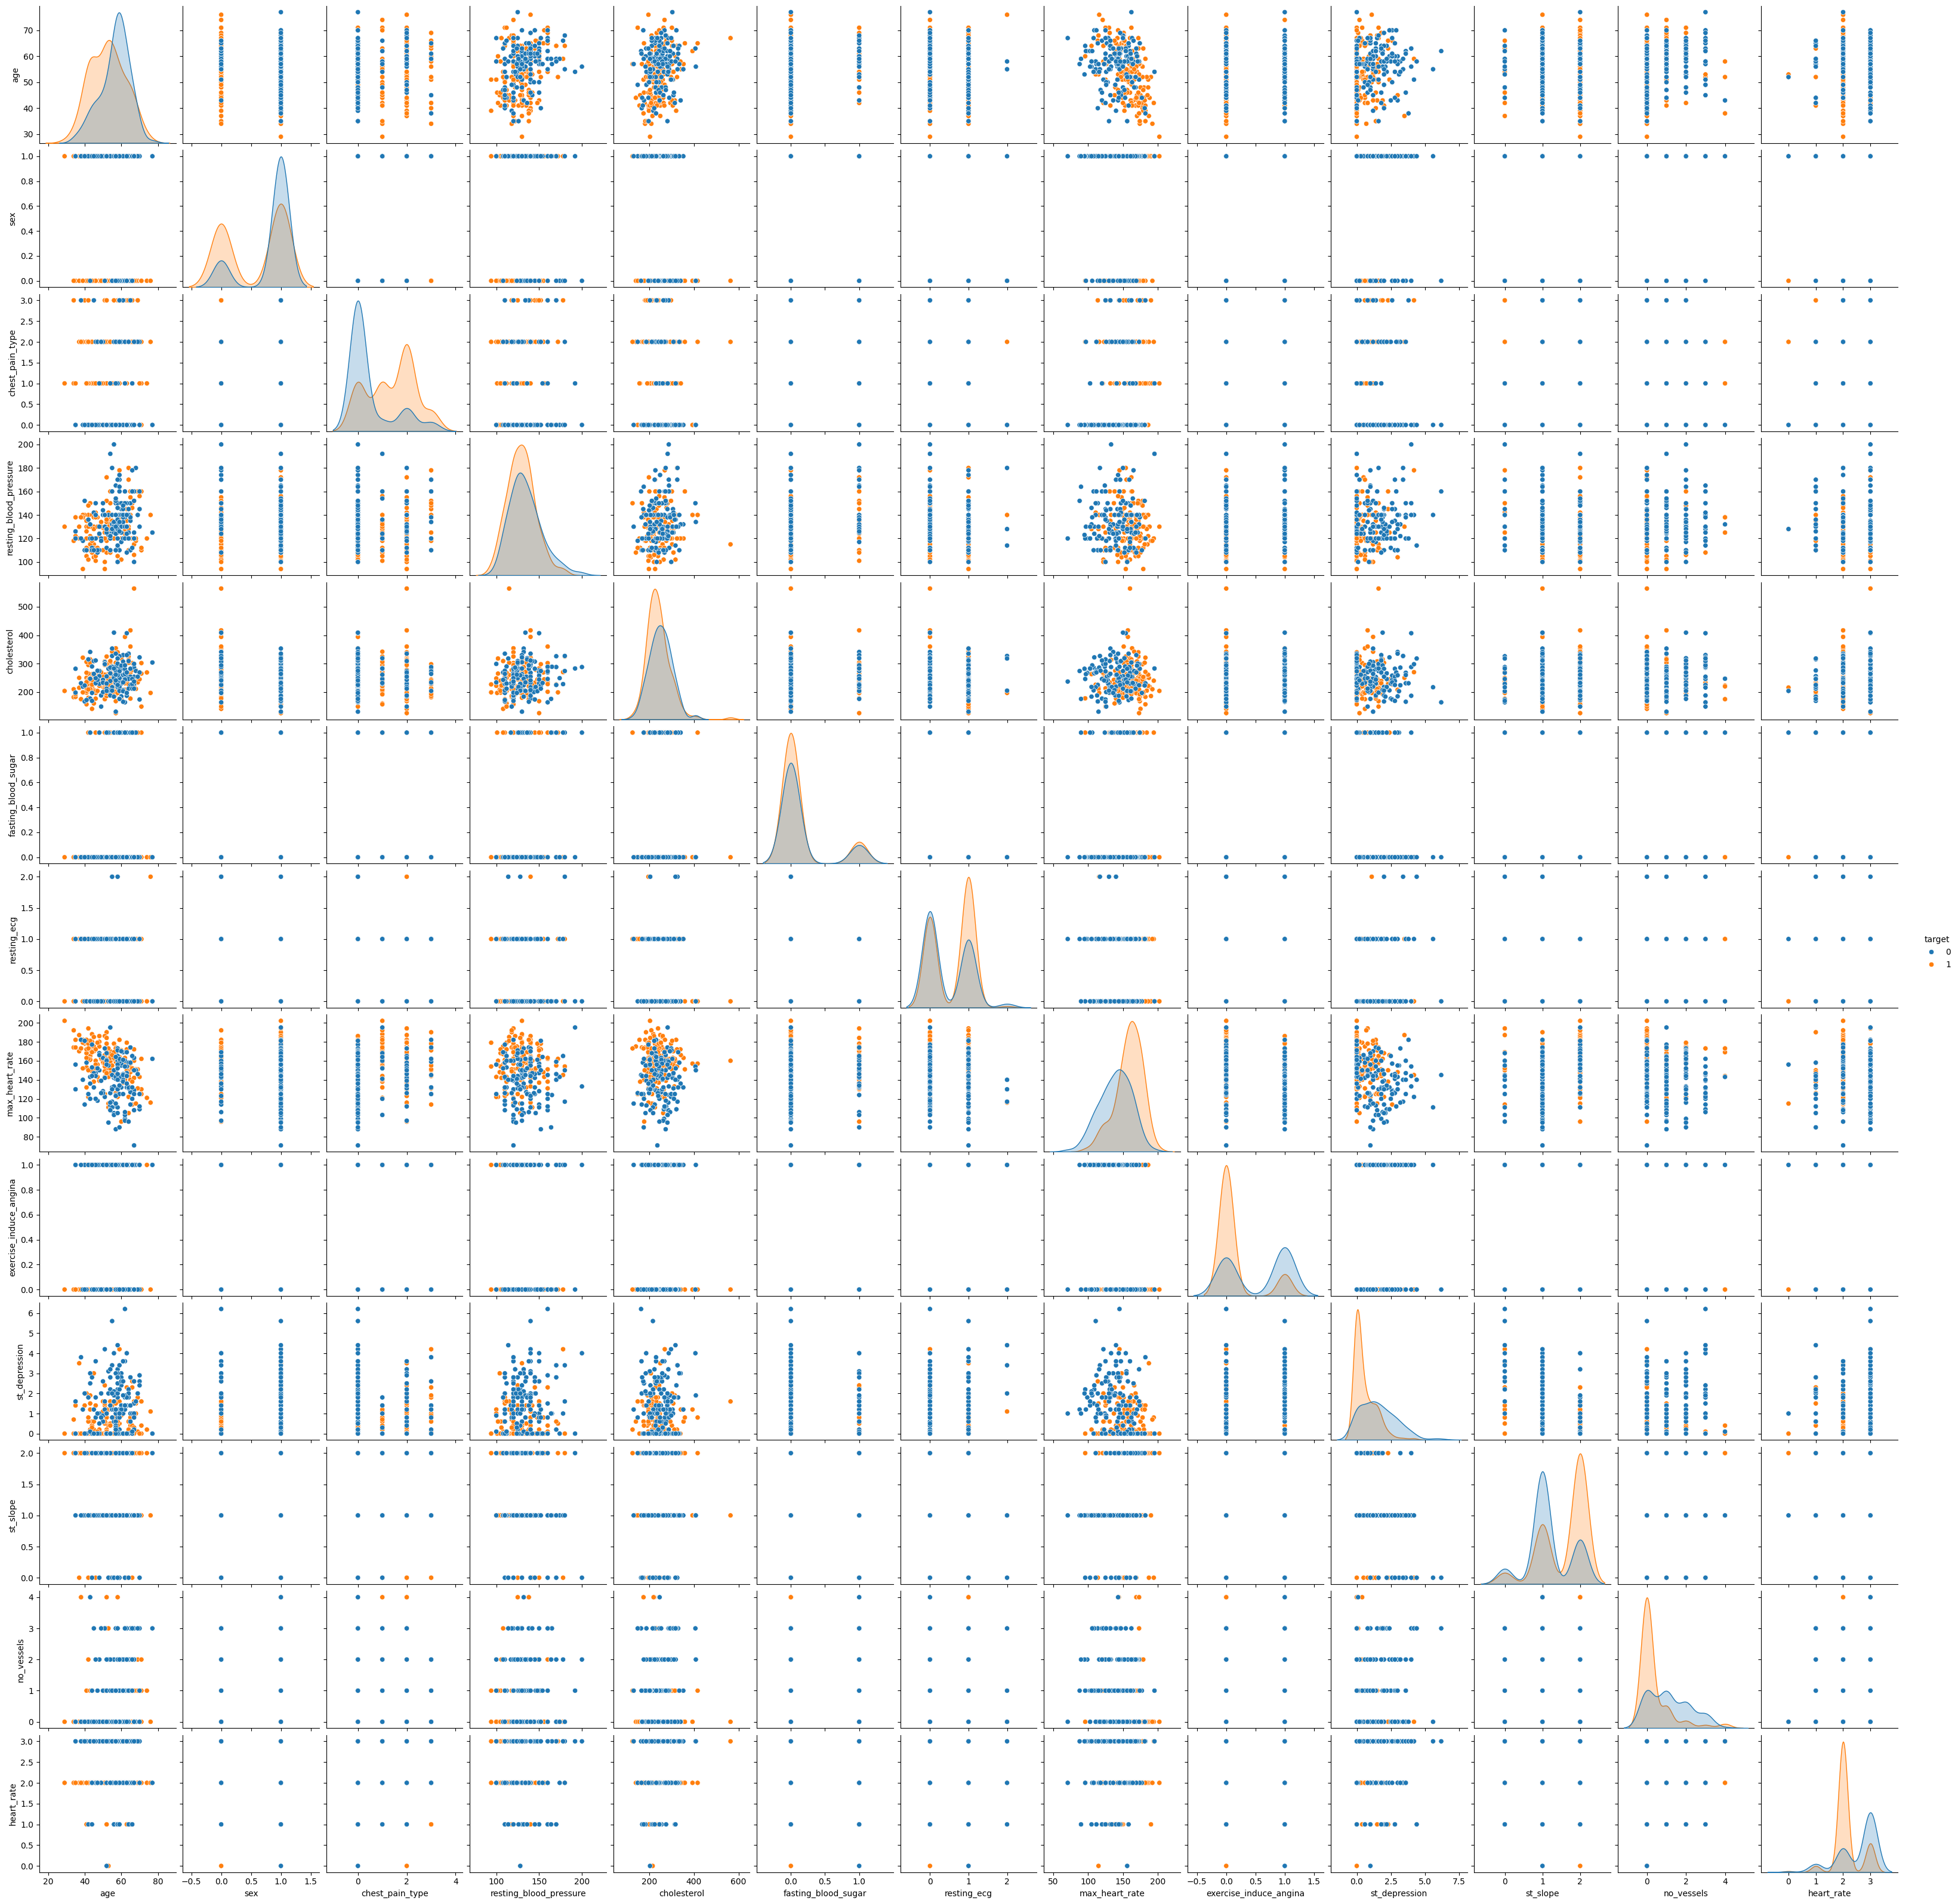

In [13]:
#correlation ,data visualization
sns.pairplot(heart,hue='target')
plt.show()





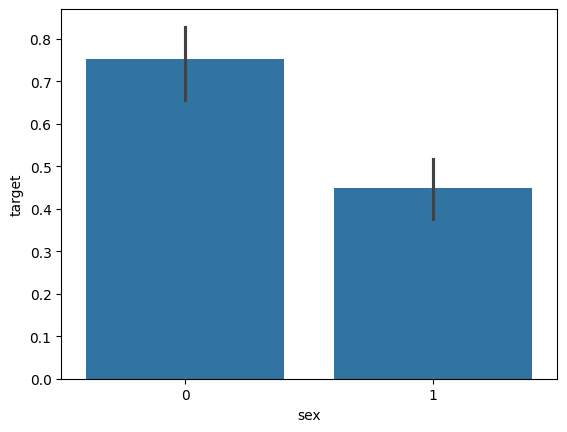

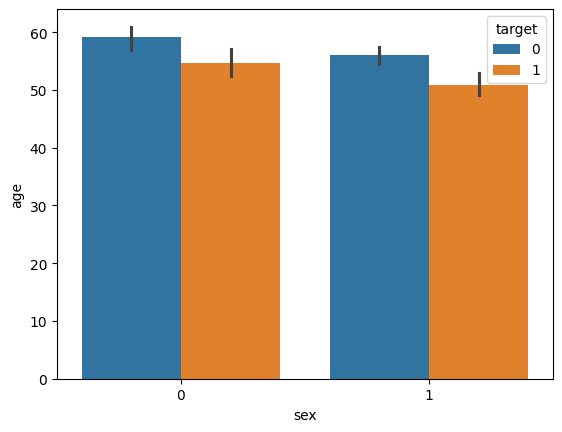

In [14]:
sns.barplot(x='sex', y='target', data=heart)
plt.show()

sns.barplot(x='sex', y='age', hue='target', data=heart)
plt.show()

<ipython-input-15-9684ac7dc629>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target' , data= heart ,palette='RdBu')


<Axes: xlabel='target', ylabel='count'>

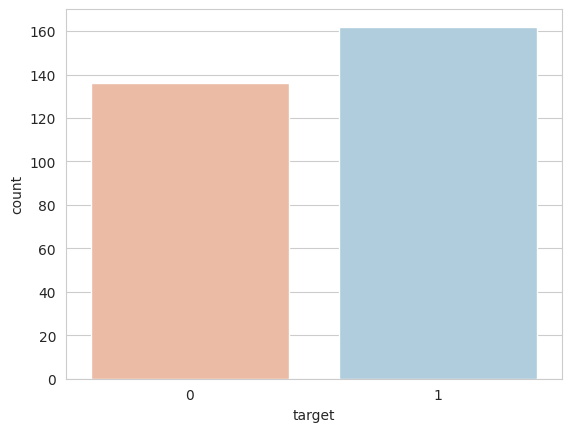

In [15]:

sns.set_style('whitegrid')
sns.countplot(x='target' , data= heart ,palette='RdBu')

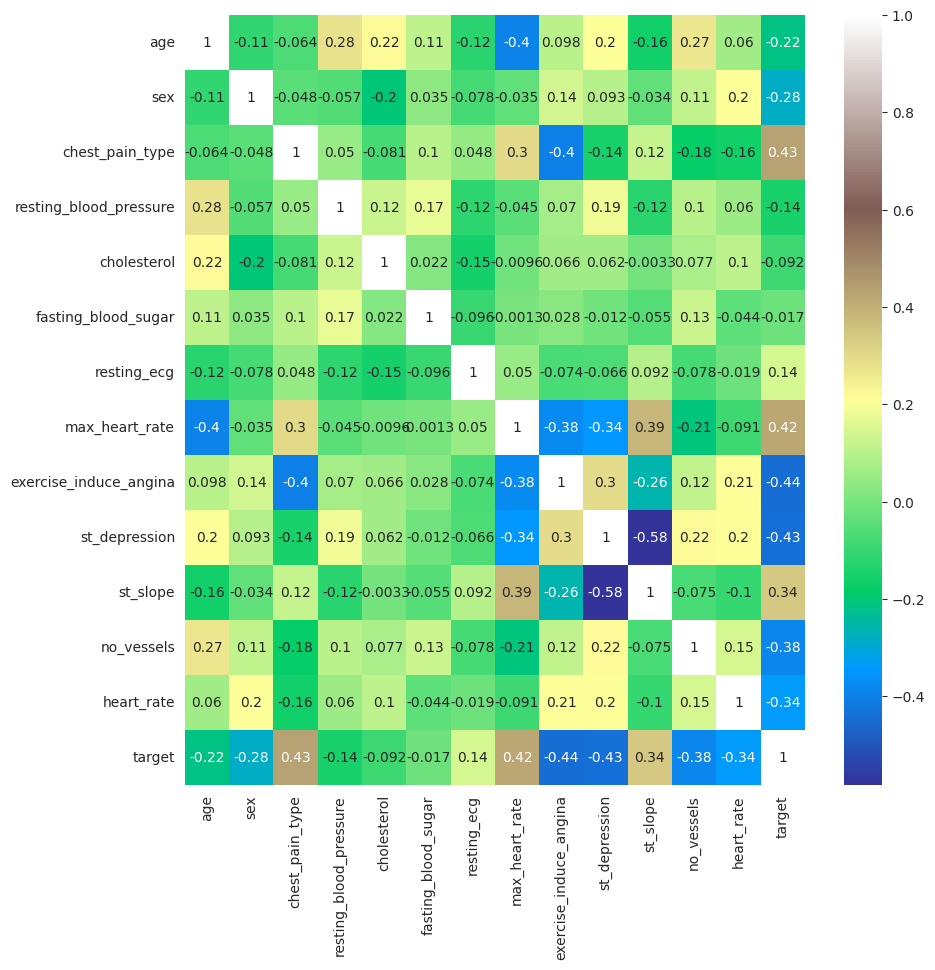

In [16]:

plt.figure(figsize= (10,10))
sns.heatmap(heart.corr(),annot=True,cmap="terrain") # annot write the data value in each cell.
plt.yticks(rotation=0)                              #horizontal labeling
plt.show()


In [17]:


from sklearn.preprocessing import OneHotEncoder

sex      = heart.iloc[:,1:2].values

#one hot encoder = ohe
ohe = OneHotEncoder(categories ="auto"  , dtype= np.int64 )
#create ndarray for one hot encodoing (sklearn)
sex = ohe.fit_transform(sex).toarray()

#sklearn one hot encoding: maps each category to 0 (male) or 1 (female)
sex = pd.DataFrame(sex)
sex.columns = ['male', 'female']
print("Sklearn one hot encoder results for sex: ")

print(sex[:20])


Sklearn one hot encoder results for sex: 
    male  female
0      0       1
1      0       1
2      0       1
3      1       0
4      0       1
5      0       1
6      0       1
7      0       1
8      0       1
9      1       0
10     0       1
11     1       0
12     1       0
13     1       0
14     1       0
15     0       1
16     1       0
17     0       1
18     0       1
19     0       1


In [18]:
cp       = heart.iloc[:,2:3].values

cp = ohe.fit_transform(cp).toarray()

cp= pd.DataFrame(cp)
cp.columns = [' typical angina', ' atypical angina', ' non-anginal pain', ' asymptomatic']

print("Sklearn one hot encoder results for cp: ")

print(cp[:10])




Sklearn one hot encoder results for cp: 
   typical angina  atypical angina  non-anginal pain  asymptomatic
0               0                0                 0             1
1               0                0                 1             0
2               0                1                 0             0
3               1                0                 0             0
4               1                0                 0             0
5               0                1                 0             0
6               0                0                 1             0
7               0                0                 1             0
8               1                0                 0             0
9               0                0                 1             0


In [19]:
fbs      = heart.iloc[:,5:6].values

#create ndarray for one hot encodoing (sklearn)
fbs = ohe.fit_transform(fbs).toarray()

#sklearn one hot encoding: maps each category to 0 (false) or 1 (true)
fbs = pd.DataFrame(fbs)
fbs.columns = [ 'False','True']
print("Sklearn one hot encoder results for fbs: ")

print(fbs[:20])






Sklearn one hot encoder results for fbs: 
    False  True
0       0     1
1       1     0
2       1     0
3       1     0
4       1     0
5       1     0
6       0     1
7       1     0
8       1     0
9       1     0
10      1     0
11      0     1
12      1     0
13      1     0
14      1     0
15      1     0
16      1     0
17      1     0
18      1     0
19      1     0


In [20]:
restecg  = heart.iloc[:,6:7].values

#create ndarray for one hot encodoing (sklearn)
restecg = ohe.fit_transform(restecg).toarray()

#sklearn one hot encoding: maps each category to 0 (Normal) 1 (ST-T wave) or 2 ( left ventricular hypertrophy)

restecg = pd.DataFrame(restecg)
restecg.columns = [ 'Normal','ST-T wave',' left ventricular hypertrophy']

print("Sklearn one hot encoder results for restecg: ")

print(restecg[:20])

Sklearn one hot encoder results for restecg: 
    Normal  ST-T wave   left ventricular hypertrophy
0        1          0                              0
1        0          1                              0
2        0          1                              0
3        0          1                              0
4        0          1                              0
5        0          1                              0
6        0          1                              0
7        0          1                              0
8        0          1                              0
9        0          1                              0
10       1          0                              0
11       1          0                              0
12       0          1                              0
13       0          1                              0
14       0          1                              0
15       0          1                              0
16       0          1                              0


In [21]:
exang    = heart.iloc[:,8:9].values

#create ndarray for one hot encodoing (sklearn)
exang = ohe.fit_transform(exang).toarray()

#sklearn one hot encoding: maps each category to 0 (No) or 1 (Yes)

exang = pd.DataFrame(exang)
exang.columns = [ 'No','Yes']

print("Sklearn one hot encoder results for exang: ")

print(exang[:20])

Sklearn one hot encoder results for exang: 
    No  Yes
0    1    0
1    1    0
2    1    0
3    0    1
4    1    0
5    1    0
6    1    0
7    1    0
8    1    0
9    1    0
10   0    1
11   1    0
12   1    0
13   1    0
14   1    0
15   1    0
16   1    0
17   1    0
18   0    1
19   1    0


In [22]:
slope    = heart.iloc[:,10:11].values


#create ndarray for one hot encodoing (sklearn)
slope = ohe.fit_transform(slope).toarray()

#sklearn one hot encoding: maps each category to 0 (Upsloping) or 1 (Flat) or 2 (Downsloping)

slope = pd.DataFrame(slope)
slope.columns = [ 'Upsloping','Flat','Downsloping']

print("Sklearn one hot encoder results for exang: ")

print (slope[:20])

Sklearn one hot encoder results for exang: 
    Upsloping  Flat  Downsloping
0           1     0            0
1           1     0            0
2           0     0            1
3           0     0            1
4           0     1            0
5           0     0            1
6           0     0            1
7           0     0            1
8           0     0            1
9           0     0            1
10          0     1            0
11          0     0            1
12          0     1            0
13          0     0            1
14          1     0            0
15          0     0            1
16          0     0            1
17          0     1            0
18          0     0            1
19          0     0            1


In [24]:
ca       = heart.iloc[:,11:12].values

#create ndarray for one hot encodoing (sklearn)
ca      = ohe.fit_transform(ca).toarray()

#sklearn one hot encoding: maps each category to 0 (1) or 1 (2) ...no of major vessels

ca     = pd.DataFrame(ca)
ca.columns = [ '1','2','3','4','5' ]

print("Sklearn one hot encoder results for ca: ")

print (ca[:20])

Sklearn one hot encoder results for ca: 
    1  2  3  4  5
0   1  0  0  0  0
1   1  0  0  0  0
2   1  0  0  0  0
3   1  0  0  0  0
4   1  0  0  0  0
5   1  0  0  0  0
6   1  0  0  0  0
7   1  0  0  0  0
8   1  0  0  0  0
9   1  0  0  0  0
10  1  0  0  0  0
11  1  0  0  0  0
12  1  0  0  0  0
13  1  0  0  0  0
14  1  0  0  0  0
15  1  0  0  0  0
16  0  0  1  0  0
17  1  0  0  0  0
18  1  0  0  0  0
19  1  0  0  0  0


In [23]:

thal     = heart.iloc[:,12:13].values

#create ndarray for one hot encodoing (sklearn)
thal  = ohe.fit_transform(thal).toarray()

#sklearn one hot encoding: maps each category to 0 ( normal) or 1 (fixed defect) or 2 ( reversable defect)

thal = pd.DataFrame(thal)
thal.columns = [ 'null','normal','fixed defect','reversable defect' ]

print("Sklearn one hot encoder results for thal: ")

print (thal[:20])

Sklearn one hot encoder results for thal: 
    null  normal  fixed defect  reversable defect
0      0       1             0                  0
1      0       0             1                  0
2      0       0             1                  0
3      0       0             1                  0
4      0       1             0                  0
5      0       0             0                  1
6      0       0             0                  1
7      0       0             1                  0
8      0       0             1                  0
9      0       0             1                  0
10     0       0             1                  0
11     0       0             1                  0
12     0       0             1                  0
13     0       0             1                  0
14     0       0             1                  0
15     0       0             1                  0
16     0       0             1                  0
17     0       0             0                  1
18     

In [ ]:
# import pandas as pd
# import io

# heart = pd.read_csv(io.StringIO (uploaded ['heart.csv'].decode ('utf-8')) )


# import pandas as pd

# heart = pd.get_dummies (heart,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
# print (heart)

In [25]:

#convert dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.20,random_state=0)



In [26]:
from sklearn .preprocessing import StandardScaler
sc          =StandardScaler()
x_train     = sc.fit_transform (x_train)
x_test      = sc .transform    (x_test)

In [27]:
x_test
y_test

print(x_train )
y_train




[[ 0.92050434]
 [ 0.92050434]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [ 0.92050434]
 [ 0.92050434]
 [ 0.92050434]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [ 0.92050434]
 [-1.08636098]
 [ 0.92050434]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [-1.08636098]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [ 0.92050434]
 [ 0.92050434]
 [-1.08636098]
 [-1.08636098]
 [-1.08636098]
 [-1.08636098]
 [ 0.92050434]
 [-1.08636098]
 [ 0.92050434]
 [ 0.92050434]
 [ 0.92050434]
 [-1.08636098]
 [ 0.92050434]
 [ 0.92050434]
 [ 0.92050434]
 [-1.08636098]
 [ 0.92050434]
 [ 0.92050434]
 [ 0.92050434]
 [ 0.92050

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [28]:
!pip install keras



In [29]:

import keras
from keras.models import Sequential
from keras.layers import Dense

# Adding input and 1st hidden layer

 #for classification of model
classifier  = Sequential()          # instance of model  sequential

# create ANN in this obj
classifier.add (Dense( 7 , kernel_initializer='glorot_uniform', activation='relu'))
# Adding 2nd hidden layer
classifier.add (Dense( 7 , kernel_initializer='glorot_uniform', activation='relu'))
#Output layer
classifier.add (Dense(1 , kernel_initializer='glorot_uniform',activation='sigmoid'))


In [30]:
#compile classifier
classifier.compile(optimizer="Adam", loss='binary_crossentropy',metrics=['accuracy'])
#adam type of SGD to find best global minimum to reduce error

In [31]:
#Training of ANN model
classifier.fit (x_train , y_train , batch_size= 100, epochs = 150 )
#mini batch gradient descent algo

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.5432 - loss: 0.7220
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5419 - loss: 0.7078 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5369 - loss: 0.6942
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5569 - loss: 0.6786
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5394 - loss: 0.6665
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7208 - loss: 0.6535 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.6383
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.6277 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.6178 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.6064 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.5975
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000

In [32]:
x_test

array([[-1.08636098],
       [ 0.92050434],
       [-1.08636098],
       [-1.08636098],
       [ 0.92050434],
       [-1.08636098],
       [-1.08636098],
       [-1.08636098],
       [-1.08636098],
       [-1.08636098],
       [ 0.92050434],
       [ 0.92050434],
       [-1.08636098],
       [ 0.92050434],
       [ 0.92050434],
       [ 0.92050434],
       [ 0.92050434],
       [ 0.92050434],
       [-1.08636098],
       [ 0.92050434],
       [ 0.92050434],
       [-1.08636098],
       [-1.08636098],
       [-1.08636098],
       [ 0.92050434],
       [-1.08636098],
       [-1.08636098],
       [-1.08636098],
       [ 0.92050434],
       [ 0.92050434],
       [-1.08636098],
       [-1.08636098],
       [ 0.92050434],
       [ 0.92050434],
       [ 0.92050434],
       [-1.08636098],
       [-1.08636098],
       [ 0.92050434],
       [-1.08636098],
       [-1.08636098],
       [ 0.92050434],
       [ 0.92050434],
       [ 0.92050434],
       [-1.08636098],
       [ 0.92050434],
       [ 0

In [33]:
#Testing Stage

y_pred  = classifier.predict (x_test)
y_pred  = (y_pred>.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


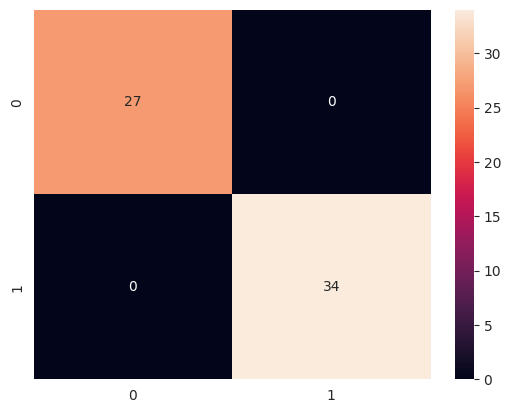

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

[[27  0]
 [ 0 34]]


In [34]:
from sklearn.metrics import confusion_matrix , classification_report

#confusion matrix
cm = confusion_matrix (y_test , y_pred)

sns.heatmap (cm,annot =True)
plt.show()
print(classification_report(y_test,y_pred))
print (confusion_matrix(y_test , y_pred))

In [35]:
(27+34)/61

1.0

In [36]:

from sklearn.tree import DecisionTreeClassifier
#feature extraction
#object creation for model
dtc  =DecisionTreeClassifier (random_state=0)
#fitting data to obj
dtc.fit  (x_train,y_train)

y_pred =dtc.predict(x_test)     #predicted values


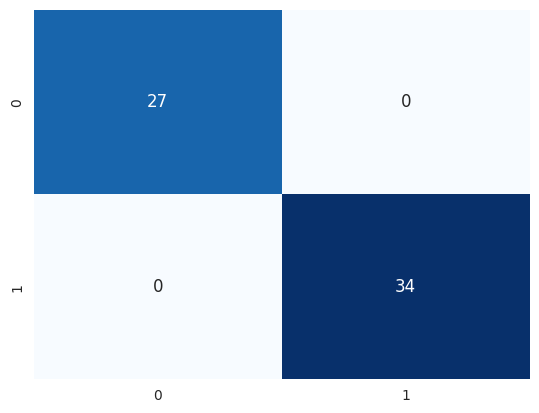

In [37]:
#performance check

from sklearn.metrics import confusion_matrix, classification_report
#check confusion matrix compare actual test_label values with pred_label ones

cm= confusion_matrix (y_test,y_pred)
sns.heatmap(cm,annot=True, cmap='Blues', fmt='d', cbar=False,annot_kws={'size':12})#no decimals only nums ,remove cbar
plt.show()



In [38]:
#CHECK classification report     to check numbered accuracy value
print(classification_report(y_test,y_pred))










              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

